In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import pandas as pd
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from glob import glob
import random

os.getcwd()

/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


'/home/vivek/Downloads'

In [3]:
directory = '/home/vivek/Desktop/Sunnybrook Files/TrainingSet'
path = os.listdir(directory)
print(path)

['patient15', 'patient12', 'patient03', '.DS_Store', 'patient07', 'patient13', 'patient08', 'patient11', 'patient16', 'patient02', 'patient14', 'patient09', 'patient06', 'patient10', 'patient04', 'patient01', 'patient05']


In [4]:
all_files = glob(os.path.join(directory,'*','*','*'))

In [5]:
#borrowed this code block from kevin mader on kaggle

all_df = pd.DataFrame(dict(path = all_files))
all_df['folder'] = all_df['path'].map(lambda x: x.split('/')[-2])
all_df['patient'] = all_df['path'].map(lambda x: x.split('/')[-3])
all_df['file_id'] = all_df['path'].map(lambda x: os.path.splitext(os.path.split(x)[1])[0])
all_df['file_ext'] = all_df['path'].map(lambda x: os.path.splitext(x)[1][1:])
all_df['slice'] = all_df['file_id'].map(lambda x: int(x.split('-')[1]))
all_df['size'] = all_df['path'].map(lambda x: os.stat(x).st_size)
all_df['data_type'] = all_df.apply(lambda c_row: 'dcm' if c_row['file_ext']=='dcm' else c_row['file_id'].split('-')[-2],1)
print(all_df.shape[0], all_df.query('size>0', inplace = True), '->', all_df.shape[0])
all_df.sample(10)

4426 None -> 3504


,path,folder,patient,file_id,file_ext,slice,size,data_type
3284,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P10contours-manual,patient10,P10-0067-icontour-manual,txt,67,11450,icontour
3156,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P06dicom,patient06,P06-0240,dcm,240,112872,dcm
3949,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P01dicom,patient01,P01-0211,dcm,211,112886,dcm
4321,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P05dicom,patient05,P05-0018,dcm,18,112876,dcm
2461,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P02dicom,patient02,P02-0019,dcm,19,112880,dcm
800,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P07contours-manual,patient07,P07-0160-ocontour-manual,txt,160,8938,ocontour
4169,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P05contours-manual,patient05,P05-0200-icontour-manual,txt,200,176,icontour
3493,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P10dicom,patient10,P10-0061,dcm,61,112884,dcm
1049,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P13dicom,patient13,P13-0126,dcm,126,112884,dcm
2996,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P06dicom,patient06,P06-0162,dcm,162,112872,dcm


In [6]:
#borrowed from kevin mader on kaggle

all_images_df = pd.pivot_table(all_df, 
               columns = 'data_type', 
               values = 'path',
               index = ['patient', 'slice'],
              aggfunc = 'first')#.reset_index()
all_images_df.sample(100)

,data_type,dcm,icontour,ocontour
patient,slice,,,
patient10,70,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient06,218,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient11,121,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient06,216,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient01,100,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,/home/vivek/Desktop/Sunnybrook Files/TrainingS...
patient12,180,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,/home/vivek/Desktop/Sunnybrook Files/TrainingS...
patient01,211,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient05,83,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient09,191,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN


In [7]:
all_images_df.reset_index()

data_type,patient,slice,dcm,icontour,ocontour
0,patient01,0,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
1,patient01,1,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
2,patient01,2,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
3,patient01,3,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
4,patient01,4,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
5,patient01,5,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
6,patient01,6,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
7,patient01,7,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
8,patient01,8,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
9,patient01,9,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN


In [8]:
#borrowed from kevin mader on kaggle

#only the parts that are true in between them remain.  we're negative the null value detection.  
#then we do bitwise assignment.
#lets only deal with input contours

valid_pts = ~all_images_df.icontour.isnull()
valid_pts &= ~all_images_df.ocontour.isnull()
valid_pts &= ~all_images_df.dcm.isnull()
labeled_df = all_images_df[valid_pts].copy()
print(labeled_df.shape)
labeled_df.head(100)



(197, 3)


data_type                                                      dcm  \
patient   slice                                                      
patient01 80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          108    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          128    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          140    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          148    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          160    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          168    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          180    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          188    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          200    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          208    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          220    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          228    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          240    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
patient02 40     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          60     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          68     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          88     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          108    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          128    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          140    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          148    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          160    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          168    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          180    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
...                                                            ...   
patient05 180    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          190    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          200    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
patient06 40     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          60     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          68     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          88     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          108    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          128    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          140    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          148    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          160    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          168    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
patient07 40     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          60     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          87     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          107    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          127    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          

In [9]:
from skimage.measure import grid_points_in_poly

def read_contour(in_path):
    c_df = pd.read_table(in_path,sep = '\s+', header=None)
    c_df.columns = ['x', 'y']
    return c_df



/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[[  4   7   8 ... 373 369 369]
 [  2   3   3 ... 394 390 383]
 [  2   2   2 ... 415 410 401]
 ...
 [  5   5   5 ... 149  92  67]
 [  5   5   4 ... 165 112  78]
 [  4   4   4 ... 143 109  89]]


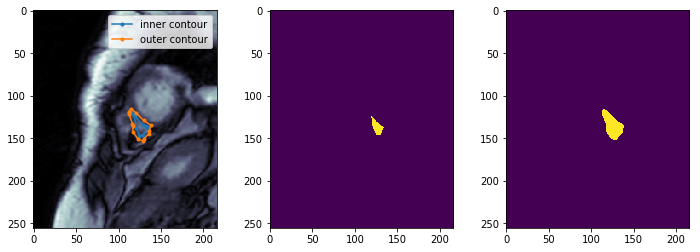

In [10]:
_, t_row = next(labeled_df.sample(1).iterrows())
t_img = dicom.read_file(t_row['dcm']).pixel_array
print(t_img)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))
ax1.imshow(t_img, cmap = 'bone')
i_df = read_contour(t_row['icontour'])
o_df = read_contour(t_row['ocontour'])
ax1.plot(i_df['x'], i_df['y'], '.-', label = 'inner contour')
ax1.plot(o_df['x'], o_df['y'], '.-', label = 'outer contour')
ax1.legend()
ax2.imshow(grid_points_in_poly(t_img.shape, i_df[['y', 'x']].values))
ax3.imshow(grid_points_in_poly(t_img.shape, o_df[['y', 'x']].values))
 

In [11]:
#this block is the main one with info from kevin mader

#SEE IF CAN CHANGE TO CV2

labeled_df['image'] = labeled_df['dcm'].map(lambda x: dicom.read_file(x).pixel_array)
labeled_df['icontour_pts'] = labeled_df['icontour'].map(read_contour)
labeled_df['ocontour_pts'] = labeled_df['ocontour'].map(read_contour)
labeled_df['mask'] = labeled_df.apply(lambda c_row: [
    grid_points_in_poly(c_row['image'].shape, c_row['icontour_pts'][['y', 'x']].values),
    grid_points_in_poly(c_row['image'].shape, c_row['ocontour_pts'][['y', 'x']].values)
], 1)


def crop_copy(in_img, size = (256, 256)):
    out_img = np.zeros(size)
    out_img[0:min(in_img.shape[0], size[0]),
           0:min(in_img.shape[1], size[1])] = in_img[0:min(in_img.shape[0], size[0]),
           0:min(in_img.shape[1], size[1])]
    return out_img
all_img_stack = np.expand_dims(np.stack(labeled_df['image'].map(crop_copy).values,0), -1)
all_mask_icontour = np.expand_dims(np.stack(labeled_df['mask'].map(lambda x: crop_copy(x[0])).values,0), -1)
print(all_img_stack.shape, all_mask_icontour.shape)



(197, 256, 256, 1) (197, 256, 256, 1)


In [11]:
import cv2

def crop_copyD(in_img, size = (256, 256)):
    out_img = np.zeros(size)
    print(labeled_df['image'].shape)
    
    out_img = cv2.resize(in_img,size)
    #out_img[0:min(in_img.shape[0], size[0]), 0:min(in_img.shape[1], size[1])] = in_img[0:min(in_img.shape[0], size[0]),0:min(in_img.shape[1], size[1])]
    return out_img


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_img_stack, all_mask_icontour, random_state = 2018, test_size = 0.25)
print(x_train.shape, x_test.shape)


(147, 256, 256, 1) (50, 256, 256, 1)


/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [13]:
import keras
from keras import Sequential,Model
from keras.optimizers import Adam,SGD
from keras.layers import Input, Dense, Concatenate, Dropout
from keras.layers import Conv2D, MaxPool2D, Activation, UpSampling2D,Conv2DTranspose, concatenate
from keras.layers.merge import Concatenate
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import skimage.io as io
import skimage.transform as trans
from keras import backend as K
K.set_image_data_format('channels_last')




#first fit very small dataset



inputs = Input(shape = (256,256,1))
#img_input = Input(shape=(channel, img_rows, img_cols))

#First Block
b1_conv1 = Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer = 'glorot_normal')(inputs)
b1_conv2 = Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer = 'glorot_normal')(b1_conv1)
b1_pool = MaxPool2D((2,2))(b1_conv2)  #maybe change to pooling
drop1= Dropout(0.2)(b1_pool)

#Second Block
b2_conv1 = Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer = 'glorot_normal')(b1_pool)
b2_conv2 = Conv2D(128,(3,3),activation='relu',padding='same')(b2_conv1)
b2_pool = MaxPool2D((2,2))(b2_conv2)
drop2= Dropout(0.2)(b2_pool)

#Third Block
b3_conv1 = Conv2D(256,(3,3),activation='relu',padding='same')(b2_pool)
b3_conv2 = Conv2D(256,(3,3),activation='relu',padding='same')(b3_conv1)
b3_pool = MaxPool2D((2,2))(b3_conv2)
drop3= Dropout(0.2)(b3_pool)

#Fourth Block
b4_conv1 = Conv2D(512,(3,3),activation='relu',padding='same')(b3_pool)
b4_conv2 = Conv2D(512,(3,3),activation='relu',padding='same')(b4_conv1)
b4_up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b4_conv2)
drop4= Dropout(0.2)(b4_up)


#Fifth Block
b5_concat = concatenate([drop4, b3_conv2], axis=3)
b5_conv1 = Conv2D(256,(3,3),activation='relu',padding='same')(b5_concat)
b5_conv2 = Conv2D(256,(3,3),activation='relu',padding='same')(b5_conv1)
b5_up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(b5_conv2)
drop5= Dropout(0.2)(b5_up)

#Sixth Block
b6_concat = concatenate([drop5, b2_conv2], axis=3)
b6_conv1 = Conv2D(128,(3,3),activation='relu',padding='same')(b6_concat)
b6_conv2 = Conv2D(128,(3,3),activation='relu',padding='same')(b6_conv1)
b6_up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b6_conv2)
drop6= Dropout(0.2)(b6_up)

#Seventh Block
#b7_concat = concatenate([drop6, b1_conv2], axis=3)
#b7_conv1 = Conv2D(64,(3,3),activation='relu',padding='same')(b7_concat)
#b7_conv2 = Conv2D(64,(3,3),activation='relu',padding='same')(b7_conv1)
#b7_up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b7_conv2)
#drop7= Dropout(0.2)(b7_up)

#Output
#do we want only 2 classes?
output_layer1 = Conv2D(2,(3,3),activation='relu',padding='same')(drop6)
output_layer = Conv2D(1,(1,1),activation='sigmoid',padding='same')(output_layer1)


# In[72]:


model = Model(inputs =inputs,outputs=output_layer)
model.summary()

Using TensorFlow backend.
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [14]:
from keras import optimizers


smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

adam = optimizers.Adam(lr=0.01)
#adam = optimizers.Adam(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=adam, loss=dice_coef_loss, metrics=[dice_coef], loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)


In [15]:
import matplotlib.pyplot as plt

def plot(history, save_path = None, dpi=600):
    plt.figure()
    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('dice')

In [ ]:
xx = x_train[:30]
yy = y_train[:30]
history = model.fit(xx, yy, epochs=20, batch_size=1, validation_split=0.2, verbose=1)

Train on 24 samples, validate on 6 samples
Epoch 1/20


In [ ]:
plot(history)

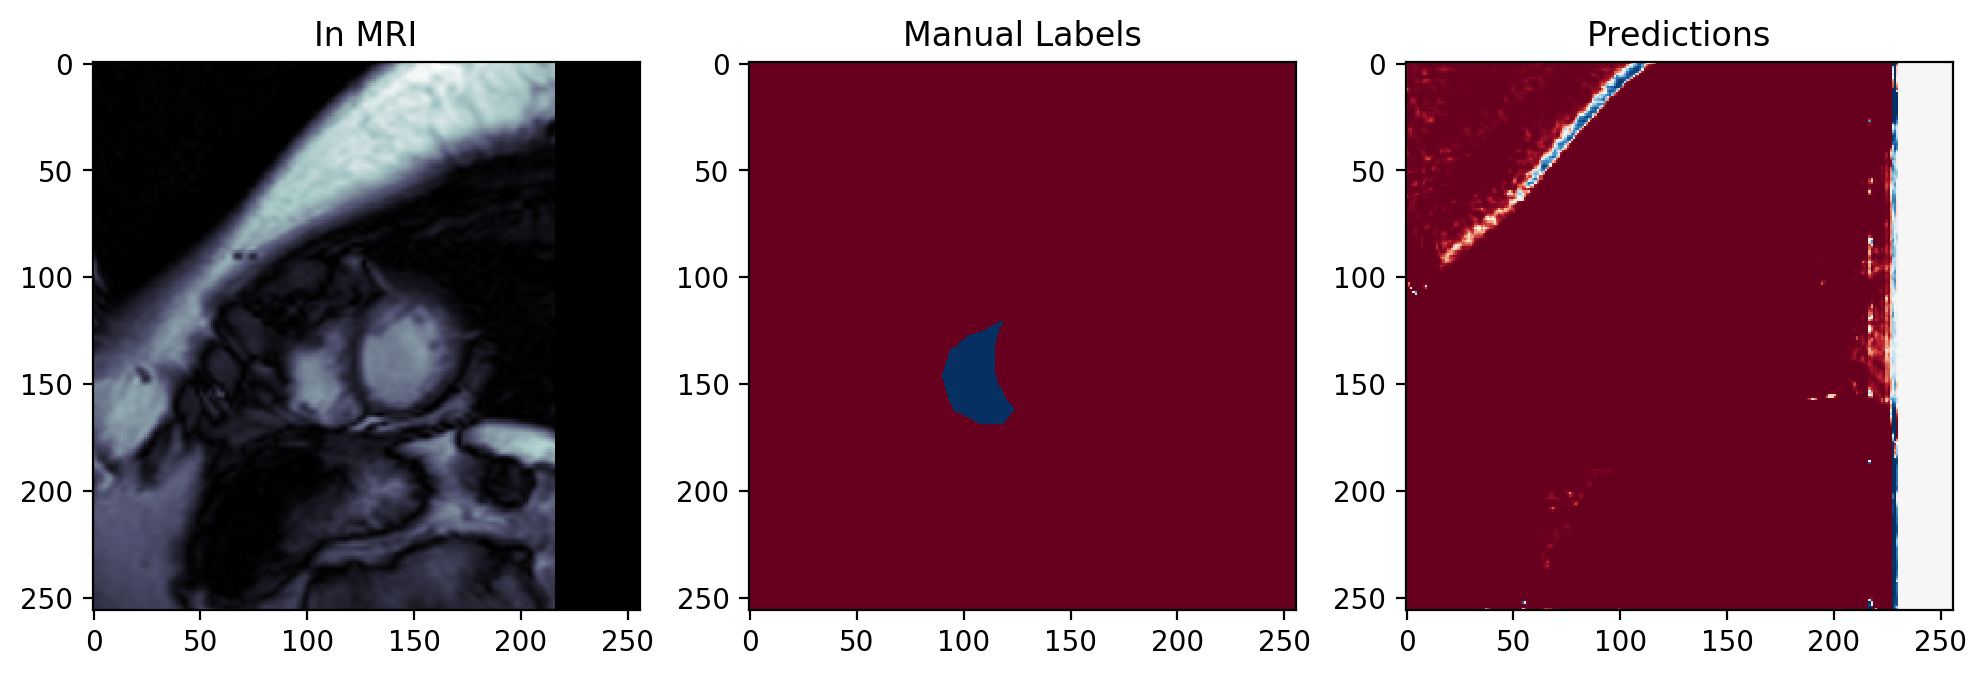

In [40]:
def show_model(in_model, idx = None):
    if idx is None:
        idx = np.random.choice(range(x_test.shape[0]))
    out_res = in_model.predict(x_test[idx:(idx+1)])
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4), dpi = 200)
    ax1.imshow(x_test[idx,:,:,0], cmap = 'bone')
    ax1.set_title('In MRI')
    ax2.imshow(y_test[idx,:,:,0], cmap = 'RdBu')
    ax2.set_title('Manual Labels')
    ax3.imshow(out_res[0,:,:,0], cmap = 'RdBu')
    ax3.set_title('Predictions')
show_model(s_seg_model)
    

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('mri_tools')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/home/vivek/.local/lib/python3.6/site-packages/keras/callbacks.py:999: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [16]:


s_seg_model.fit(x_train, y_train, 
                validation_data=(x_test, y_test), 
                verbose = 1,
               epochs = 50, 
                callbacks = callbacks_list)



Train on 147 samples, validate on 50 samples
Epoch 1/50
147/147 [==============================] - 3s 23ms/step - loss: 0.1704 - binary_crossentropy: 0.5249 - val_loss: 0.1063 - val_binary_crossentropy: 0.3707

Epoch 00001: val_loss improved from inf to 0.10625, saving model to mri_tools_weights.best.hdf5
Epoch 2/50
147/147 [==============================] - 1s 7ms/step - loss: 0.0967 - binary_crossentropy: 0.3417 - val_loss: 0.0730 - val_binary_crossentropy: 0.2728

Epoch 00002: val_loss improved from 0.10625 to 0.07304, saving model to mri_tools_weights.best.hdf5
Epoch 3/50
147/147 [==============================] - 1s 7ms/step - loss: 0.0726 - binary_crossentropy: 0.2804 - val_loss: 0.0565 - val_binary_crossentropy: 0.2394

Epoch 00003: val_loss improved from 0.07304 to 0.05650, saving model to mri_tools_weights.best.hdf5
Epoch 4/50
147/147 [==============================] - 1s 8ms/step - loss: 0.0602 - binary_crossentropy: 0.2760 - val_loss: 0.0477 - val_binary_crossentropy: 0.2412

147/147 [==============================] - 1s 8ms/step - loss: 0.0443 - binary_crossentropy: 0.5777 - val_loss: 0.0349 - val_binary_crossentropy: 0.4305

Epoch 00032: val_loss improved from 0.03494 to 0.03491, saving model to mri_tools_weights.best.hdf5
Epoch 33/50
147/147 [==============================] - 1s 8ms/step - loss: 0.0443 - binary_crossentropy: 0.5786 - val_loss: 0.0349 - val_binary_crossentropy: 0.4319

Epoch 00033: val_loss improved from 0.03491 to 0.03489, saving model to mri_tools_weights.best.hdf5
Epoch 34/50
147/147 [==============================] - 1s 8ms/step - loss: 0.0442 - binary_crossentropy: 0.5787 - val_loss: 0.0349 - val_binary_crossentropy: 0.4332

Epoch 00034: val_loss improved from 0.03489 to 0.03487, saving model to mri_tools_weights.best.hdf5
Epoch 35/50
147/147 [==============================] - 1s 8ms/step - loss: 0.0442 - binary_crossentropy: 0.5812 - val_loss: 0.0348 - val_binary_crossentropy: 0.4344

Epoch 00035: val_loss improved from 0.03487 to 0

In [17]:
model.compile(optimizer='Adam', loss='mse', metrics='accuracy', loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)


NameError: name 'model' is not defined

In [20]:
#import keras dependencies
import keras
from keras import Sequential,Model
from keras.optimizers import Adam,SGD
from keras.layers import Input, Dense, Concatenate, Dropout
from keras.layers import Conv2D, MaxPool2D, Activation, UpSampling2D,Conv2DTranspose, concatenate
from keras.layers.merge import Concatenate
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import skimage.io as io
import skimage.transform as trans


# In[25]:

#first fit very small dataset


print(all_img_stack.shape[1:])


# In[71]:


inputs = Input(shape = (256,256,1))
#img_input = Input(shape=(channel, img_rows, img_cols))

#First Block
b1_conv1 = Conv2D(64,(3,3),activation='relu',padding='same')(inputs)
b1_conv2 = Conv2D(64,(3,3),activation='relu',padding='same')(b1_conv1)
b1_pool = MaxPool2D((2,2))(b1_conv2)  #maybe change to pooling
drop1= Dropout(0.2)(b1_pool)

#Second Block
b2_conv1 = Conv2D(128,(3,3),activation='relu',padding='same')(b1_pool)
b2_conv2 = Conv2D(128,(3,3),activation='relu',padding='same')(b2_conv1)
b2_pool = MaxPool2D((2,2))(b2_conv2)
drop2= Dropout(0.2)(b2_pool)

#Third Block
b3_conv1 = Conv2D(256,(3,3),activation='relu',padding='same')(b2_pool)
b3_conv2 = Conv2D(256,(3,3),activation='relu',padding='same')(b3_conv1)
b3_pool = MaxPool2D((2,2))(b3_conv2)
drop3= Dropout(0.2)(b3_pool)

#Fourth Block
b4_conv1 = Conv2D(512,(3,3),activation='relu',padding='same')(b3_pool)
b4_conv2 = Conv2D(512,(3,3),activation='relu',padding='same')(b4_conv1)
b4_pool = MaxPool2D((2,2))(b4_conv2)
drop4= Dropout(0.2)(b4_pool)

#Fifth Block
b5_conv1 = Conv2D(1024,(3,3),activation='relu',padding='same')(b4_pool)
b5_conv2 = Conv2D(1024,(3,3),activation='relu',padding='same')(b5_conv1)
#b5_up = Conv2D(512, 2, activation = 'relu')(UpSampling2D(size = (2,2))(b5_conv2))
b5_up = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(b5_conv2)
drop5= Dropout(0.2)(b5_up)

#Sixth Block
b6_concat = concatenate([b5_up, b4_conv2], axis=3)
#b6_concat = concatenate(axis=3)(inputs=[b4_conv2,b5_up],axis=-1)
#b6_concat = Concatenate()([b4_conv2,b5_up])
b6_conv1 = Conv2D(512,(3,3),activation='relu',padding='same')(b6_concat)
b6_conv2 = Conv2D(512,(3,3),activation='relu',padding='same')(b6_conv1)
b6_up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b6_conv2)
drop6= Dropout(0.2)(b6_up)

#Seventh Block
b7_concat = concatenate([b6_up, b3_conv2], axis=3)
b7_conv1 = Conv2D(256,(3,3),activation='relu',padding='same')(b7_concat)
b7_conv2 = Conv2D(256,(3,3),activation='relu',padding='same')(b7_conv1)
b7_up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(b7_conv2)
drop7= Dropout(0.2)(b7_up)

#Eighth Block
b8_concat = concatenate([b7_up, b2_conv2], axis=3)
b8_conv1 = Conv2D(128,(3,3),activation='relu',padding='same')(b8_concat)
b8_conv2 = Conv2D(128,(3,3),activation='relu',padding='same')(b8_conv1)
b8_up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b8_conv2)
drop8= Dropout(0.2)(b8_up)

#Ninth Block
b9_concat = concatenate([b8_up, b1_conv2], axis=3)
b9_conv1 = Conv2D(64,(3,3),activation='relu',padding='same')(b9_concat)
b9_conv2 = Conv2D(64,(3,3),activation='relu',padding='same')(b9_conv1)
drop9= Dropout(0.2)(b9_conv2)

#Output
#do we want only 2 classes?
output_layer1 = Conv2D(2,(3,3),activation='relu',padding='same')(drop9)
output_layer = Conv2D(1,(1,1),activation='sigmoid',padding='same')(output_layer1)


# In[72]:


model = Model(inputs =inputs,outputs=output_layer)
model.summary()


# In[73]:

from keras import optimizers
#keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


''' 
def dice_coef(y_true, y_pred,thresh):
    y_pred = y_pred > thresh
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)

    return (2. * intersection) / (K.sum(y_true_f) + K.sum(y_pred_f) + (2. * intersection))

def dice_loss(thresh):
  def dice(y_true, y_pred):
    return -dice_coef(y_true, y_pred, thresh)
  return dice

model_dice = dice_loss(thresh=0.5)

''' 
# In[74]:


def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


# In[75]:

adam = optimizers.Adam(lr=0.01)
#adam = optimizers.Adam(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=adam, loss=dice_coef_loss, metrics=[dice_coef], loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)



# In[76]:


model.fit(x_train, y_train, nb_epoch=40, batch_size=1, validation_split=0.2, verbose=1)
#you changed number of classes to be 1.  make sure it wasn't supposed to be two.


(256, 256, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 256, 256, 64) 640         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_116[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_117[0][0]                 
_______________________________________________________________________________________________

/home/vivek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 117 samples, validate on 30 samples
Epoch 1/40
117/117 [==============================] - 11s 92ms/step - loss: -0.0771 - dice_coef: 0.0771 - val_loss: -0.0876 - val_dice_coef: 0.0876
Epoch 2/40
117/117 [==============================] - 8s 66ms/step - loss: -0.0783 - dice_coef: 0.0783 - val_loss: -0.0888 - val_dice_coef: 0.0888
Epoch 3/40
117/117 [==============================] - 8s 67ms/step - loss: -0.0791 - dice_coef: 0.0791 - val_loss: -0.0894 - val_dice_coef: 0.0894
Epoch 4/40
117/117 [==============================] - 8s 68ms/step - loss: -0.0795 - dice_coef: 0.0795 - val_loss: -0.0897 - val_dice_coef: 0.0897
Epoch 5/40
117/117 [==============================] - 8s 69ms/step - loss: -0.0797 - dice_coef: 0.0797 - val_loss: -0.0900 - val_dice_coef: 0.0900
Epoch 6/40
117/117 [==============================] - 8s 67ms/step - loss: -0.0799 - dice_coef: 0.0799 - val_loss: -0.0901 - val_dice_coef: 0.0901
Epoch 7/40
117/117 [==============================] - 8s 67ms/step - los

NameError: name 'filters' is not defined

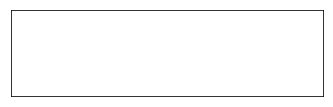

In [18]:
#bring in history callbacks and wandb
##transfer to other cnn

#see if can incorporate lr on plateau to the fitting part


#how to visualize what the model is predicting?


#convert the whole thing to pytorch.  use the visualization tool

import matplotlib.pyplot as plt

def viz_layer(layer,n_filters = 4):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        
    

    

In [47]:


from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('mri_tools')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/home/vivek/.local/lib/python3.6/site-packages/keras/callbacks.py:999: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '
